In [2]:
import pandas as pd

In [3]:
Hawaii = pd.read_csv("HawaiiMuestra.csv")

In [4]:
print(Hawaii.head())


        user_id        name_x           time  rating  \
0  1.089787e+20      Auburn D  1507964592497       5   
1  1.124086e+20     Piano Man  1519880201044       4   
2  1.157162e+20   Joe Hubbard  1490033397528       5   
3  1.181306e+20  Steve Pasion  1511165172600       4   
4  1.143021e+20  Andrew Gomez  1505179108178       3   

                                                text pics resp  \
0  My husband took me here for my birthday!  The ...  NaN  NaN   
1  was a great place.  Now closed. Too bad. We'll...  NaN  NaN   
2  cozy, great food. love how you can sign your b...  NaN  NaN   
3  Not your average little Italian joint, don't e...  NaN  NaN   
4  Service was great and the mozzarella fritta an...  NaN  NaN   

                                gmap_id      name_y  \
0  0x7c0014dcca83e7b1:0x1414a4475d8c17d  Buona Sera   
1  0x7c0014dcca83e7b1:0x1414a4475d8c17d  Buona Sera   
2  0x7c0014dcca83e7b1:0x1414a4475d8c17d  Buona Sera   
3  0x7c0014dcca83e7b1:0x1414a4475d8c17d  Buona

In [51]:
print(Hawaii.columns)


Index(['user_id', 'name_x', 'time', 'rating', 'text', 'pics', 'resp',
       'gmap_id', 'name_y', 'address', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')


In [52]:
print(f"El DataFrame tiene {Hawaii.shape[0]} filas y {Hawaii.shape[1]} columnas.")


El DataFrame tiene 17808 filas y 22 columnas.


In [53]:
print(Hawaii.describe())


            user_id          time        rating      latitude     longitude  \
count  1.780800e+04  1.780800e+04  17808.000000  17808.000000  17808.000000   
mean   1.093146e+20  1.554543e+12      4.314522     21.172494   -157.593928   
std    5.250069e+18  4.122425e+10      1.023215      0.574863      1.004076   
min    1.000014e+20  1.290981e+12      1.000000     19.062568   -166.556278   
25%    1.047595e+20  1.528759e+12      4.000000     21.278244   -157.974533   
50%    1.093330e+20  1.557350e+12      5.000000     21.328323   -157.842464   
75%    1.137792e+20  1.581122e+12      5.000000     21.397133   -157.745754   
max    1.184465e+20  1.629706e+12      5.000000     23.656022   -154.944087   

         avg_rating  num_of_reviews  
count  17808.000000    17808.000000  
mean       4.287899      755.710580  
std        0.388404     1112.912206  
min        2.400000        8.000000  
25%        4.100000       48.000000  
50%        4.300000      127.000000  
75%        4.600000   

In [5]:
# Visualización estilizada de las primeras filas
Hawaii.head(1).style.set_table_attributes("style='display:inline'").set_caption("Tabla de Datos de Hawaii")


,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,108978695102362894336.000000,Auburn D,1507964592497,5,"My husband took me here for my birthday! The best meal we have had here! The food is fresh and delicious! They have a large selection of wine. It's is a very peaceful, romantic setting. I loved it. We will definitely come back!",nan,nan,0x7c0014dcca83e7b1:0x1414a4475d8c17d,Buona Sera,"Buona Sera, 131 Hekili St #101, Kailua, HI 96734",Casual trattoria serving familiar Italian entrees in a family-friendly setting with funky decor.,21.392176,-157.742702,"['Italian restaurant', 'Restaurant']",3.700000,24,$$,"[['Wednesday', '5–8:30PM'], ['Thursday', '5–8:30PM'], ['Friday', '5–8:30PM'], ['Saturday', '5–8:30PM'], ['Sunday', '5–8:30PM'], ['Monday', 'Closed'], ['Tuesday', '5–8:30PM']]","{'Service options': ['Delivery'], 'Highlights': ['Great coffee', 'Great dessert'], 'Popular for': ['Dinner', 'Solo dining'], 'Accessibility': ['Wheelchair accessible entrance'], 'Offerings': ['Coffee', 'Comfort food'], 'Dining options': ['Dessert'], 'Atmosphere': ['Casual', 'Cozy', 'Romantic'], 'Crowd': ['Groups'], 'Planning': ['Dinner reservations recommended', 'Accepts reservations']}",Permanently closed,"['0x7c0014dc6bb23827:0x5d7cd966cd3d8b3a', '0x7c006b05086fa93f:0xb1adbd5fa6211b3f']",https://www.google.com/maps/place//data=!4m2!3m1!1s0x7c0014dcca83e7b1:0x1414a4475d8c17d?authuser=-1&hl=en&gl=us


In [55]:
%pip install qgrid


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Greta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
%pip install ipywidgets==7.7.2


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Greta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import qgrid

# Visualización interactiva
qgrid_widget = qgrid.show_grid(Hawaii, show_toolbar=True)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [58]:

# Expresión regular para extraer la ciudad entre la última coma y el estado (HI)
Hawaii['city'] = Hawaii['address'].str.extract(r',\s([\w\s]+),\sHI')

# Visualizar el resultado
print(Hawaii)


            user_id               name_x           time  rating  \
0      1.089787e+20             Auburn D  1507964592497       5   
1      1.124086e+20            Piano Man  1519880201044       4   
2      1.157162e+20          Joe Hubbard  1490033397528       5   
3      1.181306e+20         Steve Pasion  1511165172600       4   
4      1.143021e+20         Andrew Gomez  1505179108178       3   
...             ...                  ...            ...     ...   
17803  1.176941e+20          Gene Keefer  1551410685863       5   
17804  1.095592e+20  Hans Michael Fätsch  1572003851392       5   
17805  1.127450e+20        Charlie Thome  1531317796240       4   
17806  1.075047e+20       Jose Manjarrez  1529199121568       5   
17807  1.125328e+20          Bill Dasher  1568394399220       4   

                                                    text pics resp  \
0      My husband took me here for my birthday!  The ...  NaN  NaN   
1      was a great place.  Now closed. Too bad. We'll..

In [59]:
import plotly.express as px

# Agrupar datos por ciudad y contar registros
city_counts = Hawaii['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Crear gráfico interactivo
fig = px.bar(city_counts.head(20), x='city', y='count', title="Top 10 Ciudades con más Negocios en Hawaii",
             labels={'count': 'Cantidad de Negocios', 'city': 'Ciudad'}, color='count')
fig.show()


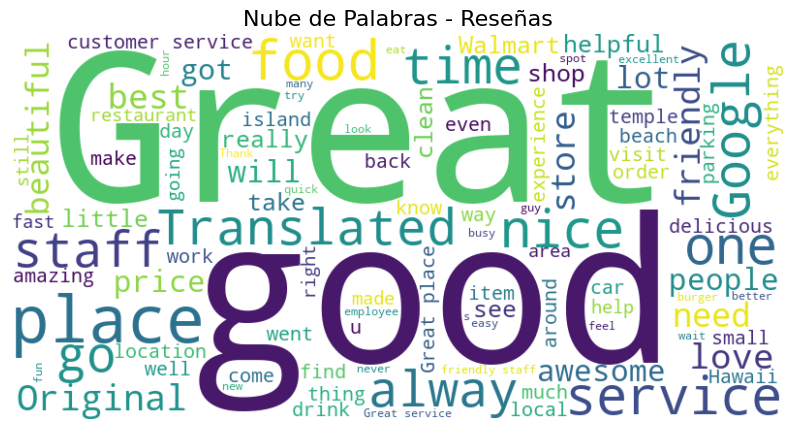

In [60]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# Combinar todas las reseñas en un solo texto
all_reviews = ' '.join(Hawaii['text'].dropna())

# Palabras que queremos excluir (stopwords)
stopwords = set(STOPWORDS)
stopwords.update([ 'fue'])  # Puedes agregar más palabras comunes

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      colormap='viridis',
                      max_words=100).generate(all_reviews)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.title('Nube de Palabras - Reseñas', fontsize=16)
plt.show()


In [61]:
# Crear mapa interactivo
fig = px.scatter_mapbox(Hawaii, lat="latitude", lon="longitude", hover_name="name_x", hover_data=["address", "city"],
                        title="Ubicación de Negocios en Hawaii", zoom=6, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [71]:
Hawaii['price'].unique()

array(['$$', nan, '$', '$$$$', '$$$', '₩', '₩₩'], dtype=object)

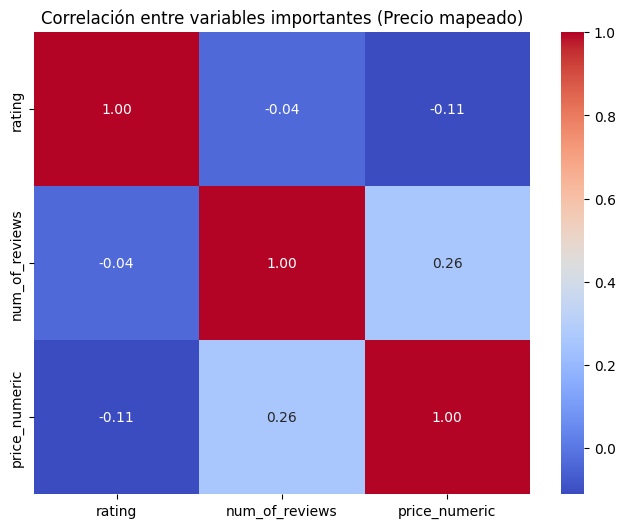

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapear la columna 'price' a valores numéricos
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4, '₩': 1, '₩₩': 2}
Hawaii['price_numeric'] = Hawaii['price'].map(price_mapping).fillna(0)

# Selección de variables clave
important_vars = ['rating', 'num_of_reviews', 'price_numeric']
hawaii_df_filtered = Hawaii[important_vars].dropna()

# Correlación entre variables
plt.figure(figsize=(8, 6))
sns.heatmap(hawaii_df_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables importantes (Precio mapeado)')
plt.show()



Relación entre rating y num_of_reviews:

La correlación es muy baja (-0.04), lo que sugiere que no existe una relación lineal significativa entre la cantidad de reseñas y la calificación promedio de los lugares. En otras palabras, tener más reseñas no implica un mayor o menor rating.
Relación entre rating y price_numeric:

La correlación es negativa y también baja (-0.11). Esto indica que hay una ligera tendencia a que precios más altos (según el mapeo numérico) estén asociados con calificaciones ligeramente más bajas, aunque el efecto es muy débil.
Relación entre num_of_reviews y price_numeric:

La correlación es positiva y moderadamente baja (0.26). Esto sugiere que, en general, lugares con precios más altos tienden a tener un número mayor de reseñas. Sin embargo, la relación no es fuerte, por lo que hay otros factores que podrían influir más en el número de reseñas.
Conclusión general:
No hay correlaciones fuertes entre las variables analizadas.
El precio numérico (price_numeric) muestra una leve correlación positiva con el número de reseñas.
El rating no parece verse fuertemente afectado ni por el precio ni por la cantidad de reseñas.

In [73]:
# Top 10 negocios exitosos (rating más alto y mayor número de reseñas)
top_successful = Hawaii.sort_values(by=['rating', 'num_of_reviews'], ascending=False).head(10)
print("Top 10 Negocios Exitosos en Hawaii:")
print(top_successful[['name_x', 'rating', 'num_of_reviews', 'address']])


Top 10 Negocios Exitosos en Hawaii:
                                      name_x  rating  num_of_reviews  \
8194                            Jan Lunsford       5            3074   
8195                        Taylor Yoshitomi       5            3074   
8197                                  Steven       5            3074   
8198                            Tamra Castro       5            3074   
8199                              Peter Ruiz       5            3074   
8200                           Trenton Davis       5            3074   
8201  Catherine “Mana's Mom” Jordan Portillo       5            3074   
8203                                  Adrian       5            3074   
8205                                Ernie P.       5            3074   
8208                            James Jordan       5            3074   

                                                address  
8194  Walmart, 1131 Kuala St, Pearl City, HI 96782, ...  
8195  Walmart, 1131 Kuala St, Pearl City, HI 96782, ...

In [75]:
# Crear variable objetivo (éxito si rating > 4 y num_of_reviews > 50)
Hawaii['success'] = ((Hawaii['rating'] > 4) & (Hawaii['num_of_reviews'] > 50)).astype(int)
print(Hawaii['success'].value_counts())


success
0    10098
1     7710
Name: count, dtype: int64


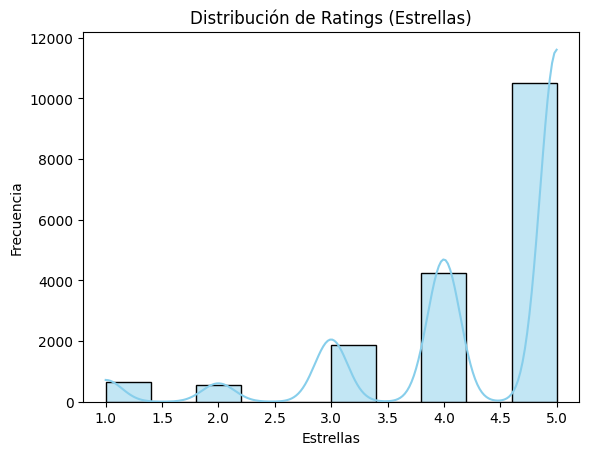

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(Hawaii['rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribución de Ratings (Estrellas)")
plt.xlabel("Estrellas")
plt.ylabel("Frecuencia")
plt.show()


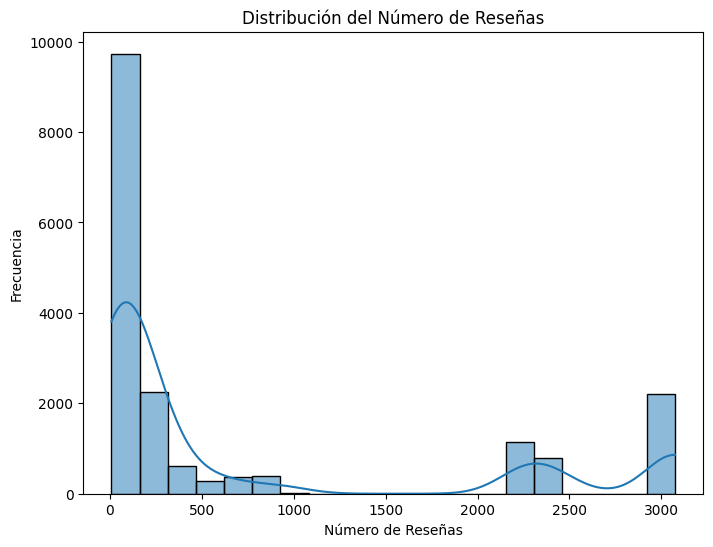

In [78]:
# Distribución del Número de Reseñas
plt.figure(figsize=(8, 6))
sns.histplot(Hawaii['num_of_reviews'], bins=20, kde=True)
plt.title("Distribución del Número de Reseñas")
plt.xlabel("Número de Reseñas")
plt.ylabel("Frecuencia")
plt.show()


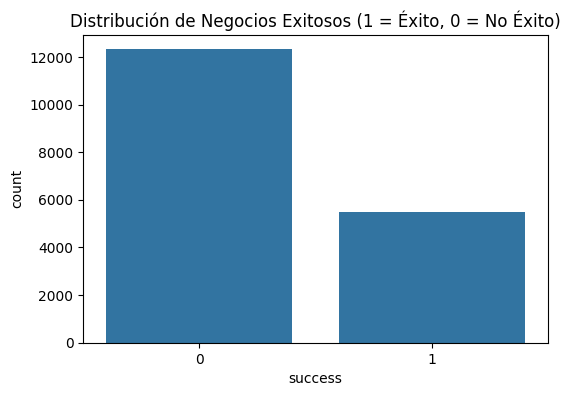

Conteo de negocios exitosos y no exitosos:
success
0    12315
1     5493
Name: count, dtype: int64


In [81]:
# Crear variable objetivo (éxito si rating > 4 y num_of_reviews > 50)
Hawaii['success'] = ((Hawaii['rating'] > 4) & (Hawaii['num_of_reviews'] > 100)).astype(int)

# Visualización de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='success', data=Hawaii)
plt.title("Distribución de Negocios Exitosos (1 = Éxito, 0 = No Éxito)")
plt.show()

# Conteo de negocios exitosos
print("Conteo de negocios exitosos y no exitosos:")
print(Hawaii['success'].value_counts())


In [82]:
from sklearn.model_selection import train_test_split

# Variables seleccionadas
features = ['rating', 'num_of_reviews', 'price_numeric', 'latitude', 'longitude']
target = 'success'

# Preparación de datos
X = Hawaii[features].dropna()
y = Hawaii.loc[X.index, target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (14246, 5)
Tamaño del conjunto de prueba: (3562, 5)


Accuracy del modelo: 1.0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2493
           1       1.00      1.00      1.00      1069

    accuracy                           1.00      3562
   macro avg       1.00      1.00      1.00      3562
weighted avg       1.00      1.00      1.00      3562



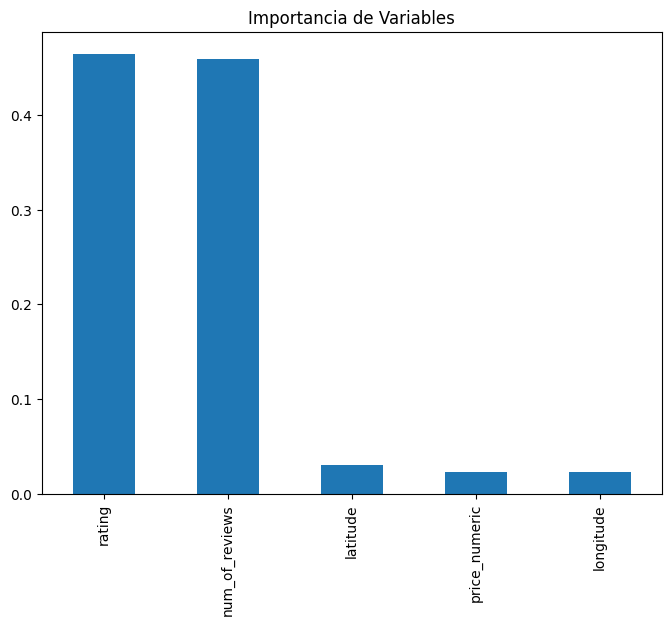

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Importancia de las variables
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 6))
plt.title("Importancia de Variables")
plt.show()


In [86]:
!pip install folium


   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   ------------------------------------- -- 102.4/108.9 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 108.9/108.9 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   ---------------------------------------- 85.1/85.1 kB 4.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Greta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [92]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.ensemble import RandomForestClassifier

# 2. Crear un mapa de Hawaii con los negocios
mapa_hawaii = folium.Map(location=[20.7967, -156.3319], zoom_start=7)  # Coordenadas generales de Hawaii

# MarkerCluster para agrupar negocios
marker_cluster = MarkerCluster().add_to(mapa_hawaii)

# Predicción de éxito y agregación al mapa
for _, row in Hawaii.iterrows():
    # Preparar las características para predicción (asegurando el mismo orden)
    features = pd.DataFrame([[
        row['rating'],            # rating
        row['num_of_reviews'],    # num_of_reviews
        row['price_numeric'],     # price_numeric
        row['latitude'],          # latitude
        row['longitude']          # longitude
    ]], columns=['rating', 'num_of_reviews', 'price_numeric', 'latitude', 'longitude'])
    
    # Hacer la predicción
    prediction = model.predict(features)[0]
    prob_success = model.predict_proba(features)[0][1] * 100  # Probabilidad de éxito

    # Mensaje emergente con información
    popup_text = f"""
    <b>{row['name_x']}</b><br>
    Dirección: {row['address']}<br>
    Rating: {row['rating']}<br>
    Reseñas: {row['num_of_reviews']}<br>
    Precio: {row['price']}<br>
    Probabilidad de éxito: {prob_success:.2f}%<br>
    Factor Clave de Éxito: Reseñas & Precio
    """

    # Color de los marcadores
    color = "green" if prediction == 1 else "red"

    # Agregar marcador al mapa
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(marker_cluster)

# 3. Guardar el mapa como archivo HTML
mapa_hawaii.save("mapa_negocios_hawaii.html")
print("Mapa guardado como mapa_negocios_hawaii.html")



Mapa guardado como mapa_negocios_hawaii.html
